In [1]:
# Add Matplotlib inline magic command.
%matplotlib inline

# Import dependencies.
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load.
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the both Dataframes into a single pandas Dataframe.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Calculate the total rides, total drivers, and total fares for each city type.
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# Calculate the average fare, and average fare per driver for each city type.
avg_fares_per_ride = total_fares / total_rides
avg_fares_per_driver = total_fares / total_drivers

avg_fares_per_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
# Create a summary Dataframe.
index = pyber_data_df.groupby(["type"])
summary_df = pd.DataFrame({'Total Rides': total_rides, 'Total Drivers': total_drivers,
                           'Total Fares': total_fares, 'Average Fare per Ride': avg_fares_per_ride, 
                           'Average Fare per Driver': avg_fares_per_driver})
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [16]:
# Format the summary Dataframe.
summary_df['Total Rides'] = summary_df['Total Rides'].map("{:,}".format)
summary_df['Total Drivers'] = summary_df['Total Drivers'].map("{:,}".format)
summary_df['Total Fares'] = summary_df['Total Fares'].map("${:,.2f}".format)
summary_df['Average Fare per Ride'] = summary_df['Average Fare per Ride'].map("${:.2f}".format)
summary_df['Average Fare per Driver'] = summary_df['Average Fare per Driver'].map("${:.2f}".format)

summary_df.index.name = None

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [17]:
# Reformat the column headers in the Dataframe.
new_column_names = {'city': 'City', 'date':'Date','fare':'Fare',
                    'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}
pyber_data_df = pyber_data_df.rename(columns = new_column_names)
pyber_data_df.set_index('Date', inplace=True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [19]:
# Create a copy of pyber_data_df Dataframe and drop the extra columns.
pyber_data_df_copy = pyber_data_df.copy().drop(['Ride Id','City','No. Drivers'], axis = 1)
pyber_data_df_copy.head()

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban


In [20]:
# Use the '.info' functionto make sure the index is a datetime data type.
pyber_data_df_copy.info

<bound method DataFrame.info of                       Fare City Type
Date                                
2019-01-14 10:14:22  13.83     Urban
2019-03-04 18:24:09  30.24     Urban
2019-02-24 04:29:00  33.44     Urban
2019-02-10 23:22:03  23.44     Urban
2019-03-06 04:28:35  34.58     Urban
...                    ...       ...
2019-04-29 17:04:39  13.38     Rural
2019-01-30 00:05:47  20.76     Rural
2019-02-10 21:03:50  11.11     Rural
2019-05-07 19:22:15  44.94     Rural
2019-04-25 10:20:13  55.84     Rural

[2375 rows x 2 columns]>

In [22]:
# Calculate the '.sum()'' of fares by the type of city and date on a new DataFrame. 
pyber_data_df_FareSum = pyber_data_df_copy.groupby(["City Type","Date"]).sum().reset_index()
pyber_data_df_FareSum.head()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [27]:
# Create a pivot table DataFrame with the 'Date' as the index and columns = 'City Type' 
# with the 'Fare' for each date in each row.
pyber_data_pivottable = pd.pivot_table(pyber_data_df_FareSum, index=['Date'],
                    columns=['City Type'], aggfunc=np.sum)
pyber_data_pivottable.head()

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [24]:
# Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' with the '.loc' function.
pyber_data_dates = pyber_data_pivottable.loc ['2019-01-01':'2019-04-29']
pyber_data_dates.head()

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75

In [25]:
# Create a new DataFrame by setting the previous DataFrame with '.resample()' in weekly bins. 
# Calculate the sum() of the fares for each week.
# Set to DatetimeIndex
pyber_data_dates.index = pyber_data_dates.index.astype('datetime64[ns]')
pyber_data_dates_resample = pyber_data_dates.resample('W').sum()
pyber_data_dates_resample.head()

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94

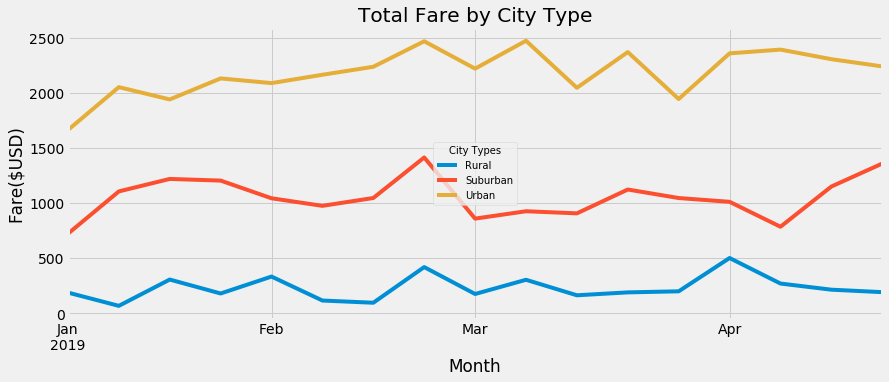

In [29]:
# Input the values for the chart and plot.
plt.style.use('fivethirtyeight')
pyber_data_plot = pyber_data_dates_resample.plot(figsize = (13,5))
plt.title('Total Fare by City Type')
plt.xlabel('Month')
plt.ylabel('Fare($USD)')
#plt.xlim('Jan','May')
lgnd = plt.legend(fontsize="10", mode="Expanded", scatterpoints=1, 
                  loc="best", title="City Types", labels = ['Rural','Suburban','Urban'])
lgnd.get_title().set_fontsize(10)
plt.savefig('analysis/Fig8.png')